In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [21]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplot, e.g.,
          ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot t

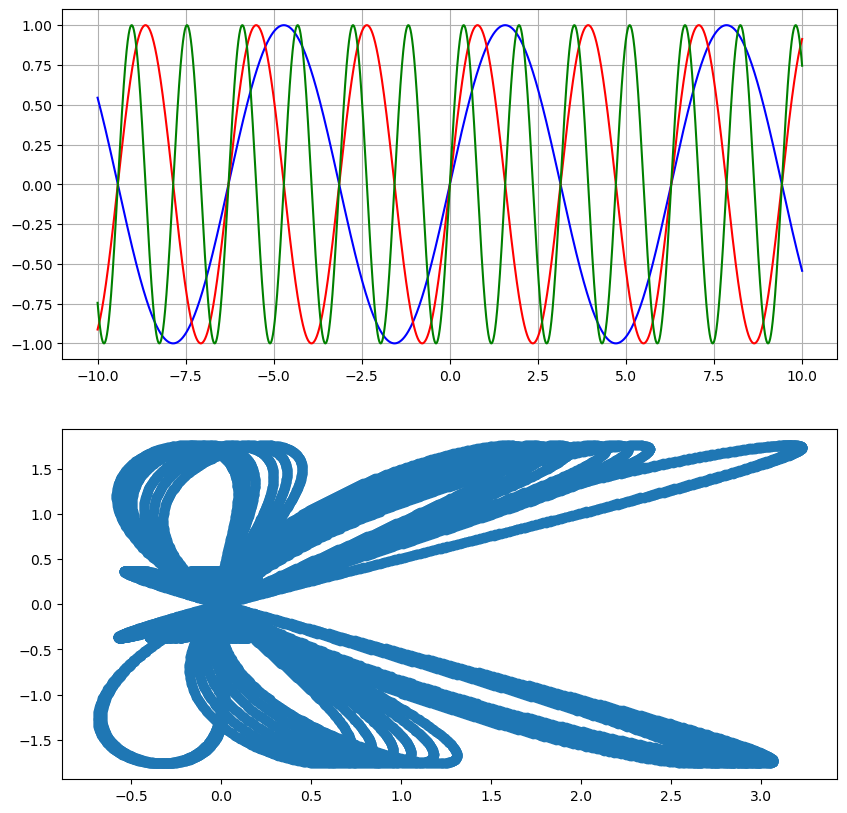

In [3]:
n = int(1e5)

x = np.linspace(-10, 10, num=n)
ys = np.sin(x)
ys2 = np.sin(2*x)
ys3 = np.sin(3*x)
ys4 = np.sin(4*x)
yc = np.cos(2*np.pi*200*x)

w = yc + ys
s = ys + ys2
f = s*w
plt.figure(figsize=(10,10))

plt.subplot(2, 1 ,1)
plt.grid(True)
plt.plot(x,ys, 'b')
plt.plot(x,ys2,'r')
plt.plot(x,ys4,'g')

plt.subplot(2, 1, 2)
plt.scatter(f[::5], s[::5])

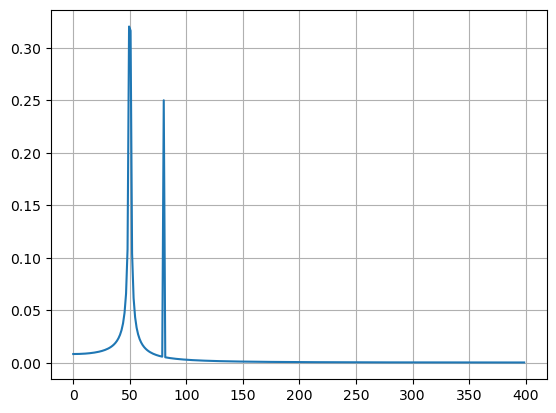

In [14]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
yff = 1.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yff)
plt.grid()
plt.show()

In [22]:
# Mean Filter
def moving_avg(input, win):
    avg = np.ndarray([], dtype = 'float', order = 'C')   # defines empty avg array
    mov_sum = np.sum(input[:int(win)])                   # defines sum of values in window
    avg = np.append(avg, mov_sum/win)
    for i in range(int(len(input) - win)):
        mov_sum += (input[int(i + win)] - input[i]) # Shifts window to the right by one unit
        avg = np.append(avg, mov_sum/win)
        
    return avg

In [27]:
win = 5
filt_aud = moving_avg(yff, win)
print(len(filt_aud), filt_aud)
print(len(yff), yff)

297 [0.00033153 0.00841542 0.00844614 0.00848953 0.00854597 0.00861598
 0.00870019 0.00879942 0.00891464 0.00904701 0.00919794 0.00936909
 0.00956248 0.00978047 0.01002591 0.01030224 0.01061361 0.01096507
 0.01136283 0.01181461 0.01233007 0.01292149 0.01360475 0.01440063
 0.01533704 0.01645224 0.01780026 0.01946016 0.0215527  0.02427309
 0.02796151 0.03327774 0.04173344 0.05802537 0.11586912 0.17162849
 0.18293737 0.18213169 0.16921115 0.1118392  0.05399091 0.0376929
 0.02922958 0.02390417 0.020205   0.01747225 0.01536572 0.01369017
 0.0123248  0.01119051 0.01023323 0.00941464 0.00870681 0.00808885
 0.00754485 0.00706246 0.00663191 0.05514721 0.05479848 0.05448234
 0.05419454 0.05393153 0.00478853 0.00456659 0.00436177 0.00417223
 0.00399638 0.00383283 0.00368039 0.00353801 0.00340476 0.00327983
 0.00316249 0.00305211 0.00294811 0.00284998 0.00275726 0.00266953
 0.00258643 0.00250762 0.00243279 0.00236167 0.00229399 0.00222954
 0.00216809 0.00210946 0.00205347 0.00199995 0.00194876 0.0

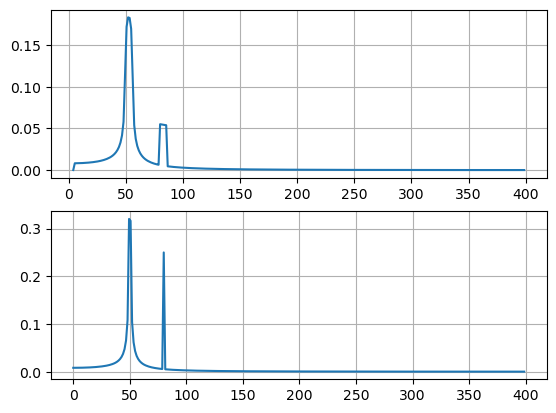

In [28]:


# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

xf = fftfreq(N, T)[:N//2]      # Generates the frequency axis for N-even to give positive frequencies (explains spike at 0)
xff = fftfreq(N , T)[:N//2] 
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(xff[win-2:], filt_aud)
plt.grid()
plt.subplot(2,1,2)
plt.plot(xf, yff)

plt.grid()

plt.show()

In [ ]:
# Frequency Dictonary
#Note names, index is how many pitches above C0 the note is
#frequency converted to index value by index=12log(base2)(frequency)-48
pitches=['C0','Db0','D0','Eb0','E0','F0','Gb0','G0','Ab0','A0','Bb0','B0',
         'C1','Db1','D1','Eb1','E1','F1','Gb1','G1','Ab1','A1','Bb1','B1',
         'C2','Db2','D2','Eb2','E2','F2','Gb2','G2','Ab2','A2','Bb2','B2',
         'C3','Db3','D3','Eb3','E3','F3','Gb3','G3','Ab3','A3','Bb3','B3',
         'C4','Db4','D4','Eb4','E4','F4','Gb4','G4','Ab4','A4','Bb4','B4',
         'C5','Db5','D5','Eb5','E5','F5','Gb5','G5','Ab5','A5','Bb5','B5',
         'C6','Db6','D6','Eb6','E6','F6','Gb6','G6','Ab6','A6','Bb6','B6',
         'C7','Db7','D7','Eb7','E7','F7','Gb7','G7','Ab7','A7','Bb7','B7',
         'C8','Db8','D8','Eb8','E8','F8','Gb8','G8','Ab8','A8','Bb8','B8']

In [29]:
# Freqency to Note Function
import math

def noteName(freq):                     #function to convert frequency to note name
    index=int(12*math.log2(freq)-48)    #convert frequency to index value of pitches list
    return pitches[index]               #return note name at index 